In [43]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
    import sys
    import os
    sys.path.append(os.path.abspath('.'))
    sys.path.append(os.path.abspath('.\.'))
    sys.path.append(os.path.abspath('c:/fontesrobustez-query'))

In [45]:
print(sys.path)

['c:\\Fontes\\robustez-query\\code\\analysis', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\python37.zip', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\DLLs', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query', '', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages\\win32', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages\\win32\\lib', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages\\Pythonwin', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\borela\\.ipython', 'c:\\Fontes\\robustez-query\\code\\analysis', 'c:\\Fontes\\robustez-query\\code\\analysis', 'c:\\Fontes\\robustez-query\\code\\analysis', 'c:\\Fontes\\robustez-query\\code\\analysis', 'c:\\Fontes\\robustez-query\\code\\analysis\\\x0contes\robustez

In [51]:
df = pd.read_csv('c:/Fontes/robustez-query/data/comparative_rerank_score_judment_eval.csv', sep = ';', 
    header=0, dtype= {'id_modelo':str, 'qtd_bm25':np.int64, 'qtd_rerank':np.int64, 'cod_original_query':np.int64, 'score':str, 'eval':np.int64, 'qtd_judment_assumed_zero_relevance':np.int64, 'noise_kind':np.int64 })


In [52]:
df['score'] = df['score'].astype(float) 

In [53]:
df.head()

,id_modelo,qtd_bm25,qtd_rerank,cod_original_query,score,eval,qtd_judment_assumed_zero_relevance,noise_kind
0,ptt5-base-msmarco-100k,50,20,23849,-0.016671,3,0,0
1,ptt5-base-msmarco-100k,50,20,23849,-0.054921,2,0,0
2,ptt5-base-msmarco-100k,50,20,23849,-0.060116,3,0,0
3,ptt5-base-msmarco-100k,50,20,23849,-0.091595,1,0,0
4,ptt5-base-msmarco-100k,50,20,23849,-0.103466,2,0,0


In [54]:
df.groupby(['eval', 'id_modelo']).agg({'score':['mean', 'count', 'median', 'min', 'max', 'std', 'var']})

score                                      \
                                 mean count    median       min       max   
eval id_modelo                                                              
0    mt5-base-multi-msmarco -0.977945  4210 -0.403877 -7.908485 -0.001056   
     ptt5-base-msmarco-100k -1.275947  4269 -0.437539 -8.408588 -0.002923   
1    mt5-base-multi-msmarco -0.430210  1788 -0.100511 -5.778224 -0.001481   
     ptt5-base-msmarco-100k -0.650318  1723 -0.121588 -7.124670 -0.001966   
2    mt5-base-multi-msmarco -0.203365  1169 -0.054592 -5.583581 -0.001327   
     ptt5-base-msmarco-100k -0.214785  1192 -0.058702 -5.095103 -0.001509   
3    mt5-base-multi-msmarco -0.127463  1463 -0.016749 -2.617347 -0.000903   
     ptt5-base-msmarco-100k -0.162025  1446 -0.028184 -3.002904 -0.001683   

                                                 
                                  std       var  
eval id_modelo                                   
0    mt5-base-multi-msmarco  1.383246  1.913370  
     ptt5-base-msmarco-100k  1.772725  3.142553  
1    mt5-base-multi-msmarco  0.764727  0.584808  
     ptt5-base-msmarco-100k  1.104868  1.220734  
2    mt5-base-multi-msmarco  0.484747  0.234980  
     ptt5-base-msmarco-100k  0.461014  0.212534  
3    mt5-base-multi-msmarco  0.277306  0.076899  
     ptt5-base-msmarco-100k  0.357131  0.127542

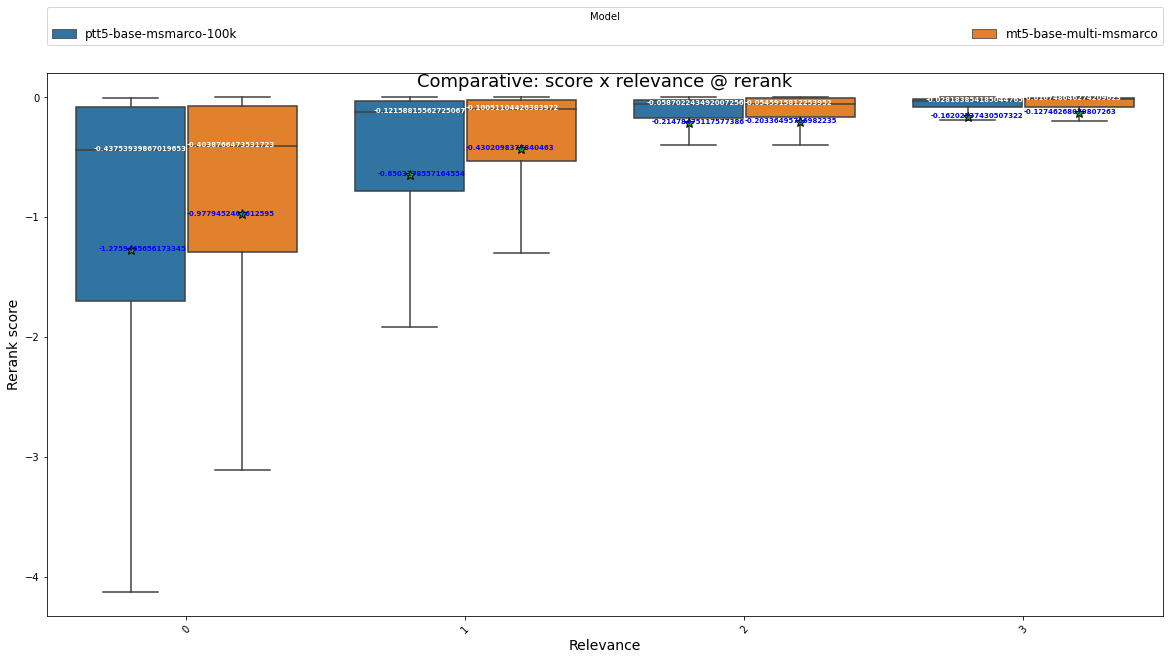

In [70]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x='eval', hue='id_modelo',  y="score", ax=ax,  data=df, showfliers = False, showmeans=True, meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.xlabel('Relevance', fontsize=14)
plt.ylabel('Rerank score', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Comparative: score x relevance @ rerank', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Model') 

medians = df.query("id_modelo == 'mt5-base-multi-msmarco'" ).groupby(['eval'])['score'].median()
means = df.query("id_modelo == 'mt5-base-multi-msmarco'" ).groupby(['eval'])['score'].mean()
vertical_offset = df.query("id_modelo == 'mt5-base-multi-msmarco'" )['score'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='left',size='x-small',color='w',weight='semibold')
# vertical_offset = df['score'].mean() * 0.05 # offset from median for display
    ax.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='left',size='x-small',color='b',weight='semibold')


medians = df.query("id_modelo == 'ptt5-base-msmarco-100k'" ).groupby(['eval'])['score'].median()
means = df.query("id_modelo == 'ptt5-base-msmarco-100k'" ).groupby(['eval'])['score'].mean()
vertical_offset = df.query("id_modelo == 'ptt5-base-msmarco-100k'" )['score'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='right',size='x-small',color='w',weight='semibold')
# vertical_offset = df['score'].mean() * 0.05 # offset from median for display
    ax.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='right',size='x-small',color='b',weight='semibold')

plt.show()

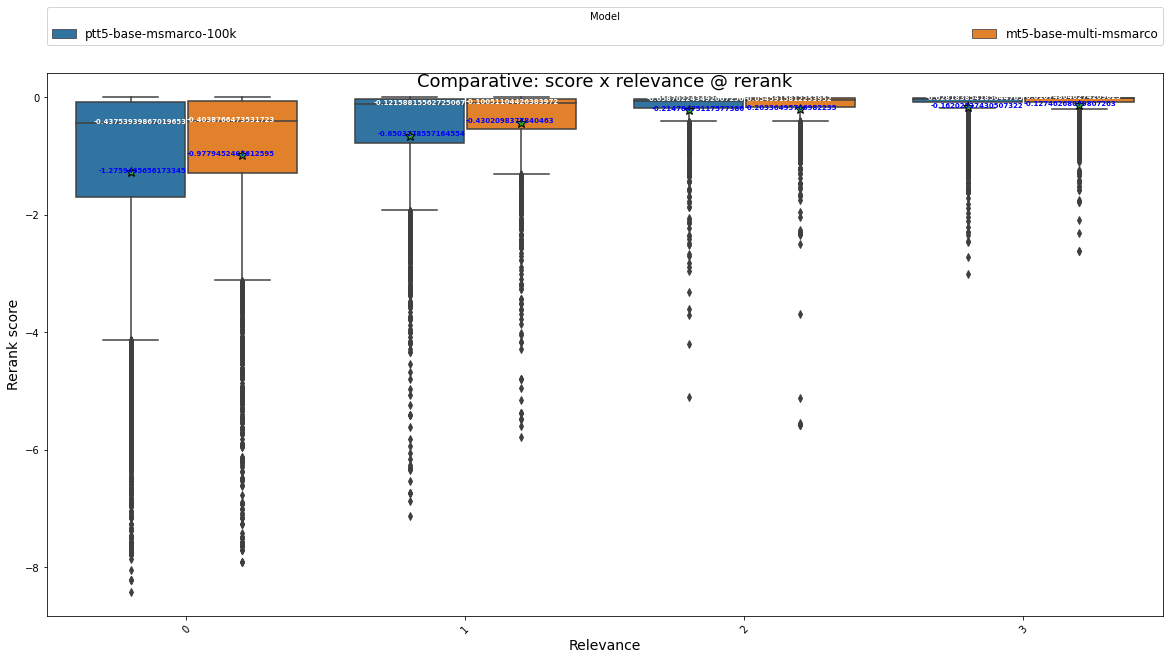

In [74]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x='eval', hue='id_modelo',  y="score", ax=ax,  data=df, showfliers = True, showmeans=True, meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.xlabel('Relevance', fontsize=14)
plt.ylabel('Rerank score', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Comparative: score x relevance @ rerank', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Model') 

medians = df.query("id_modelo == 'mt5-base-multi-msmarco'" ).groupby(['eval'])['score'].median()
means = df.query("id_modelo == 'mt5-base-multi-msmarco'" ).groupby(['eval'])['score'].mean()
vertical_offset = df.query("id_modelo == 'mt5-base-multi-msmarco'" )['score'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='left',size='x-small',color='w',weight='semibold')
# vertical_offset = df['score'].mean() * 0.05 # offset from median for display
    ax.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='left',size='x-small',color='b',weight='semibold')


medians = df.query("id_modelo == 'ptt5-base-msmarco-100k'" ).groupby(['eval'])['score'].median()
means = df.query("id_modelo == 'ptt5-base-msmarco-100k'" ).groupby(['eval'])['score'].mean()
vertical_offset = df.query("id_modelo == 'ptt5-base-msmarco-100k'" )['score'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='right',size='x-small',color='w',weight='semibold')
# vertical_offset = df['score'].mean() * 0.05 # offset from median for display
    ax.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='right',size='x-small',color='b',weight='semibold')

plt.show()

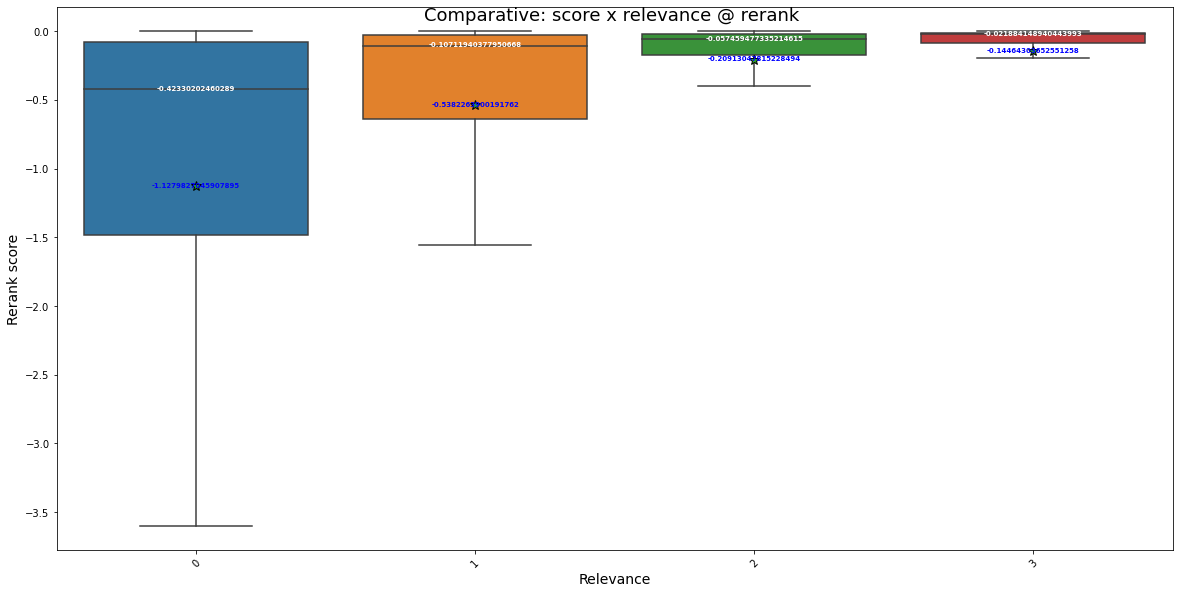

In [73]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x='eval',  y="score", ax=ax,  data=df, showfliers = False, showmeans=True, meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.xlabel('Relevance', fontsize=14)
plt.ylabel('Rerank score', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Comparative: score x relevance @ rerank ', y=1.0, pad=-14, fontsize=18)
#plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 

medians = df.groupby(['eval'])['score'].median()
means = df.groupby(['eval'])['score'].mean()
vertical_offset = df['score'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
# vertical_offset = df['score'].mean() * 0.05 # offset from median for display
    ax.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='b',weight='semibold')

plt.show()